- Raw sampling and Feature sampling
- On next base learner : Raw sampling with replacment also feature sampling with replacemnet
- all the decision trees gets trained with respect all training dataset
- when new test data is given:
  - In classification - majority voting classification
  - In Regression - Average output of the model

**Why should we use Random forest instead of DT?**

- Decision tree leads to overfitting
    
    - It leads to low bias in traing accuracy and high variance in testing accuracy. With the help of random forest we maintaine low bias in training accuracy and reduce variance to low variance

# Problem 
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.



In [13]:
# Importing important libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
import warnings 

warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('/home/aromal/Documents/jupyter_Lab/Datasets_Main/Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning

**Handling missing values** 
1. Handdling missing values
2. Handling duplicates
3. Check data type
4. Understand teh dataset

In [16]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [18]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [19]:
df.Gender.value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [20]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [21]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [22]:
## Checking missing values 
## these are the features with nan value
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [23]:
## Checking missing values 
## these are the features with nan value
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]
print(features_with_na)
print('------------------') 
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 5), '% missing values')

['Age', 'TypeofContact', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']
------------------
Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [24]:
# Statisctics fo numerical columns (Null cols)
df[features_with_na].select_dtypes(exclude = 'object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null values
1. Impute Median value for Age column
2. Impute Mode for Type of contract
3. Impute Medain for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PrefferedPropertyStar
6. Impute Median for NumverofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthyIncome

In [26]:
# Age
df['Age'].fillna(df.Age.median(), inplace= True)

# TypeOfContracta
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace= True)

# DurationOfPitch
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(), inplace= True)

# PrefferedPropertyStar
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0], inplace=True)

# NumberOfTips
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median() , inplace=True)

# NumberOfChildrenVisiting
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace=True)

# Monthly income
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

# NumberOfFolloups
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0], inplace=True)

In [27]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [28]:
df.drop('CustomerID',inplace=True, axis=1)

## Feature Engineering 

In [30]:
# Create new column feature 
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns= ['NumberOfChildrenVisiting', 'NumberOfPersonVisiting'] ,axis=1, inplace=True)

In [31]:
# get all the numerical features 
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of numerical features: ', len(num_feature))

Number of numerical features:  12


In [32]:
# Categorical features 
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of categorical features:', len(categorical_features))

Number of categorical features: 6


In [33]:
# Discrete features 
discrete_feature = [feature for feature in num_feature if len(df[feature].unique()) <= 25]
print('Number of discrete features :',len(discrete_feature))

Number of discrete features : 9


In [34]:
# Continues ffeatures
continues_feature = [feature for feature in num_feature if feature not in discrete_feature]
print('Number of continues features', len(continues_feature))

Number of continues features 3


## Train test split and model training

In [36]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [37]:
from sklearn.model_selection import train_test_split
X = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']

In [38]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [39]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [40]:
X.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [41]:
# Create a column Transformer with 3 types of tranformers 
categorical_features = X.select_dtypes(include='object').columns
num_feature = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, categorical_features),
        ('StandardScaler', numeric_transformer, num_feature)
    ]
)

In [42]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [43]:
##  apply transformation in training(fit_transform)
X_train = preprocessor.fit_transform(X_train)

In [44]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [45]:
## apply transformation on test(transfomation)
X_test = preprocessor.transform(X_test)

## random forest classifier training

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
accuracy_score,
classification_report,
ConfusionMatrixDisplay,
precision_score,
recall_score, 
f1_score, 
roc_auc_score, 
roc_curve
)
from sklearn.tree import DecisionTreeClassifier # just for understanding only
from sklearn.linear_model import LogisticRegression # just for understanding

# Most efficient way of training the model

In [49]:
models = {
    'Random Forest':RandomForestClassifier(),
    # 'Decision Tree':DecisionTreeClassifier(),
    # 'Logistic Regression':LogisticRegression(),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # train model
    
    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # training set perfomance 

    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    modle_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
    # Test set perfomance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    modle_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model perfomance for training')
    print(f'- Accuracy {model_train_accuracy:.4f}')
    print(f'- F1 Score {model_train_f1:.4f}')    
    print(f'- Precision {model_train_precision:.4f}')
    print(f'- Recall {model_train_recall:.4f}')
    print(f'- Roc Auc Score {modle_train_rocauc_score:.4f}')

    print('-------------------------')

    print('Model perfomance for testing')
    print(f'- Accuracy {model_test_accuracy:.4f}')
    print(f'- F1 Score {model_test_f1:.4f}')    
    print(f'- Precision {model_test_precision:.4f}')
    print(f'- Recall {model_test_recall:.4f}')
    print(f'- Roc Auc Score {modle_test_rocauc_score:.4f}')
    print('-----------------------< >--------------------')

Random Forest
Model perfomance for training
- Accuracy 1.0000
- F1 Score 1.0000
- Precision 1.0000
- Recall 1.0000
- Roc Auc Score 1.0000
-------------------------
Model perfomance for testing
- Accuracy 0.9213
- F1 Score 0.7556
- Precision 0.9597
- Recall 0.6230
- Roc Auc Score 0.8083
-----------------------< >--------------------


## Hyperparameter tuning 

In [51]:
## hyperparameter tuning 
rf_params = {
    'max_depth' : [5, 8, 15, None, 10],
    'max_features' : [5, 7, 'auto', 8],
    'min_samples_split' : [2, 8, 15, 20],
    'n_estimators' : [100, 200, 500, 1000]
}

In [52]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [53]:
## Models list for Hyperparameter tuning
# This is also an efficient way of hyprparameter tuning 

randomcv_models = [
    ('RF', RandomForestClassifier(), rf_params),
]


In [54]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [55]:
from sklearn.model_selection import RandomizedSearchCV

model_param  = {}
for name, model, params in randomcv_models: 
    random = RandomizedSearchCV(estimator=model, 
                               param_distributions=params,
                               n_iter=100, 
                               cv=3,# cross validation
                               verbose=2, 
                               n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param: 
    print(f'-------Best Params for {model_name}---------')
    print(model_param[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits
-------Best Params for RF---------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [102]:
# again train the models
from joblib import dump

models = {
    'Random Forest': RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, max_features= 8, max_depth= None)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # train model
    
    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # training set perfomance 

    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    modle_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
    # Test set perfomance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    modle_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model perfomance for training')
    print(f'- Accuracy {model_train_accuracy:.4f}')
    print(f'- F1 Score {model_train_f1:.4f}')    
    print(f'- Precision {model_train_precision:.4f}')
    print(f'- Recall {model_train_recall:.4f}')
    print(f'- Roc Auc Score {modle_train_rocauc_score:.4f}')

    print('-------------------------')

    print('Model perfomance for testing')
    print(f'- Accuracy {model_test_accuracy:.4f}')
    print(f'- F1 Score {model_test_f1:.4f}')    
    print(f'- Precision {model_test_precision:.4f}')
    print(f'- Recall {model_test_recall:.4f}')
    print(f'- Roc Auc Score {modle_test_rocauc_score:.4f}')
    print('-----------------------< >--------------------')

    # model_file_name = f"{model_name.replace(' ', '_').lower()}_model.joblib"  # Create a unique file name
    # dump(model, model_file_name)  # Save the model
    # print(f"Model saved as {model_file_name}")

Random Forest
Model perfomance for training
- Accuracy 1.0000
- F1 Score 1.0000
- Precision 1.0000
- Recall 1.0000
- Roc Auc Score 1.0000
-------------------------
Model perfomance for testing
- Accuracy 0.9356
- F1 Score 0.8085
- Precision 0.9638
- Recall 0.6963
- Roc Auc Score 0.8450
-----------------------< >--------------------
Model saved as rf_model.joblib


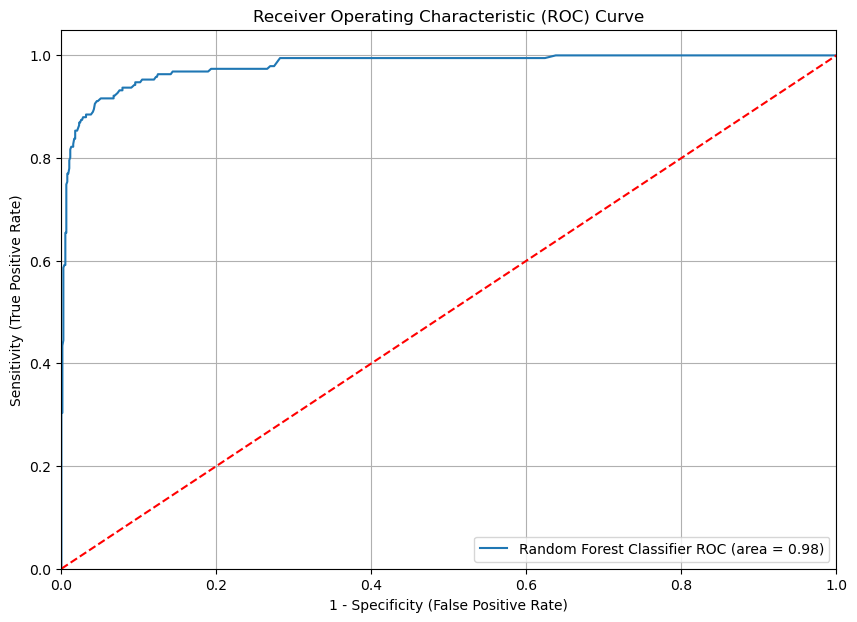

In [103]:
from sklearn.metrics import roc_auc_score, roc_curve

# Initialize the models list
auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features=7, max_depth=None)
    }
]

# Create a plot
plt.figure(figsize=(10, 7))

# Loop through all models
for algo in auc_models:
    model = algo['model']  # Select the model
    label = algo['label']  # Model label
    model.fit(X_train, y_train)  # Train the model
    
    # Compute False Positive Rate, True Positive Rate, and thresholds
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    # Calculate AUC
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f'{label} ROC (area = {auc_score:.2f})')

# Custom settings for the plot
plt.plot([0, 1], [0, 1], 'r--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
